In [1]:

import numpy as np
from scipy import optimize
import matplotlib.pylab as plt

Primer punto

In [2]:
#Hallar los ceros de la ecuación: exp(x)- 2 = cos(exp(x)-2), así nos queda la función f(x)= cos(exp(x)-2) - exp(x)+ 2

Fx_1 = lambda x: np.exp(x)- 2
Fx_2 = lambda x: np.cos(Fx_1(x))
Fx = lambda x: Fx_2(x) - Fx_1(x)

raiz_b = optimize.bisect(Fx,1,4) #Bisection Method
raiz_n = optimize.newton(Fx,3)   #Newton-Raphson Method
print("{},{}".format("Raiz por el método de Bisección:" , raiz_b))
print("{},{}".format("Raiz por el método de Newton-Raphson:" , raiz_n))  
print("{},{}".format("Diferencia entre las raíces (raiz_b - raiz_n):", raiz_b-raiz_n))

Raiz por el método de Bisección:,1.007623971657722
Raiz por el método de Newton-Raphson:,1.0076239716581368
Diferencia entre las raíces (raiz_b - raiz_n):,-4.147793219999585e-13


PUNTO 2

In [ ]:

#Ecuacion: x(t) = (-2g/w^2) * ( (exp(wt)-exp(-wt))/2  ) - sen(wt)
t = 1 # s
g = 9.76 # m/s^2
x = 0.51 # m

ho_1 = lambda omega : (-2*g)/(omega**2 - x) * (np.exp(omega*t)-np.exp(-omega*t))/(2*x)
ho_2 = lambda omega : -np.sin(-omega*t)/x
ho = lambda omega : ho_1(omega) + ho_2(omega)

raiz2_n = optimize.newton(ho,3)   #Newton-Raphson Method
print("{},{}".format("Raiz por el método de Newton-Raphson:" , raiz2_n))

PUNTO 3

In [3]:
# Ecuación: V = L*((pi*r^2)/2 - r^2*arcsen(h/r) - h*(r^2 - h^2)^(1/2))

V = 12.4 #pies
L = 10 #pies
r = 1 #pies

gh_1 = lambda h : (np.pi*0.5 - np.arcsin(h/r))* r**2 
gh_2 = lambda h : - h*(r**2 - h**2)**(1/2)
gh = lambda h : (L/V)*(gh_1(h) + gh_2(h))

raiz3_n = optimize.newton(gh,0)   #Newton-Raphson Method
print("{},{}".format("La profundidad del agua es:" , r - raiz3_n))

La profundidad del agua es:,1.1102119445993708e-08


PUNTO 4

In [4]:

#Valores dados, tenemos que llegar a que alpha = 33
l = 89 #pulg
h = 49 #pulg
D = 55
beta = 0.064*np.pi #11.5 grados en radianes
#Definicion de ecuaciones con los valores dados
A = l*np.sin(beta)
B = l*np.cos(beta)
C = (h+0.5*D)*np.sin(beta)-0.5*D*np.tan(beta)
E = (h+0.5*D)*np.cos(beta)-0.5*D
#Funcion General
Function = lambda alpha: A*np.sin(alpha)*np.cos(alpha) + B*np.sin(alpha)**2 - C*np.cos(alpha) - E*np.sin(alpha)
raiz_alpha = optimize.bisect(Function,0,5)
raiz_grados = (180/np.pi)*raiz_alpha
print("La raiz es:", raiz_grados)
#FIJEMONOS QUE DIO APROXIMADAMENTE 33grados, ASÍ QUE ACABAMOS DE COMPROBAR LO QUE NOS PIDEN.

La raiz es: 32.97064403893084


PUNTO 5 - REPRODUCCIÓN DEL FRACTAL QUE SE HIZO EN LA CLASE CAMBIANDO UN POCO LAS FUNCIONES PARA EXPERIMENTAR

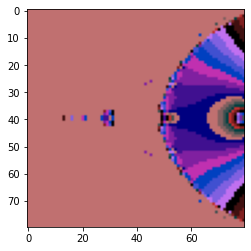

In [5]:

from PIL import Image
Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

#Definicion  la funcion y las derivada 
def f(z): 
  return z**2 - 1

def fp(z): 
  return 3*z**2

h = 1E-4
def fpn(z, h): 
  return (f(z+h)-f(z))/h
a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1 
  y = -1
  for zy_ in zy: 
      y = y + 1
      Z_0 = complex(zx_, zy_)
    
      for i in range(0, Niteraciones): 
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break 
          
        Z_0 = Z
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16
      
      image.putpixel((x,y), (r,g,b) )
plt.imshow(image)